<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/Statistical_Testing_COMPLETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 Allow access to GDrive and Load the data

In [8]:
# Step 1: Load necessary libraries #
import pandas as pd
from google.colab import drive

# Step 2: Mount Google Drive to access files #
drive.mount('/content/drive')

# Step 3: Define the path to the dataset folder
path = '/content/drive/My Drive/data_olist/'

# Step 4: Load each CSV file into a DataFrame #
sellers_df = pd.read_csv(path + 'olist_sellers_dataset.csv')
orders_df = pd.read_csv(path + 'olist_orders_dataset.csv')
order_items_df = pd.read_csv(path + 'olist_order_items_dataset.csv')
customers_df = pd.read_csv(path + 'olist_customers_dataset.csv')
order_payments_df = pd.read_csv(path + 'olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
products_df = pd.read_csv(path + 'olist_products_dataset.csv')

# Step 5: Explore the structure of the dataset #
# Display the first few rows of each DataFrame#
print("Sellers Dataset:")
print(sellers_df.head())
print("\nOrders Dataset:")
print(orders_df.head())
# Similarly, print head of other DataFrames so I can see #

# Check data types and missing values #
print("\nData Types:")
print(orders_df.dtypes)
print("\nMissing Values:")
print(orders_df.isnull().sum())



Mounted at /content/drive
Sellers Dataset:
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  

Orders Dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920a

Next Step 6: Clean the data (if necessary)
# Handle missing values & Perform data type conversions if necessary



In [9]:
print("Missing Values in Sellers Dataset:")
print(sellers_df.isnull().sum())
print("\nMissing Values in Orders Dataset:")
print(orders_df.isnull().sum())
print("\nMissing Values in Order Items Dataset:")
print(order_items_df.isnull().sum())
print("\nMissing Values in Customers Dataset:")
print(customers_df.isnull().sum())
print("\nMissing Values in Order Payments Dataset:")
print(order_payments_df.isnull().sum())
print("\nMissing Values in Order Reviews Dataset:")
print(order_reviews_df.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())



Missing Values in Sellers Dataset:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Missing Values in Orders Dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing Values in Order Items Dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing Values in Customers Dataset:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing Values in Order Payments Dataset:
order_id        

There are no missing values in Sellers, Order Items, Customers, Order Payments data sets. But there are missing values in Orders, Order Reviews, Products. I'll consider what to do with these as we go and as we understand the tasks.

As there is missing data in some datasets, I'll start by calculating basic descriptive stats from datasets where there is no missing data.

Task: Order Price Statistics:

    Mean order price: This represents the average amount spent per order.$X
    Median order price: This is the middle value of the order prices when they are sorted in ascending order. It’s a measure of central tendency that is less affected by outliers compared to the mean. $Y
    Standard deviation of order prices: This measures the dispersion or variability of order prices around the mean. A higher standard deviation indicates more variability in order prices.$Z
    Histogram of order prices showing the distribution: This visualizes the distribution of order prices, showing how frequently different price ranges occur.


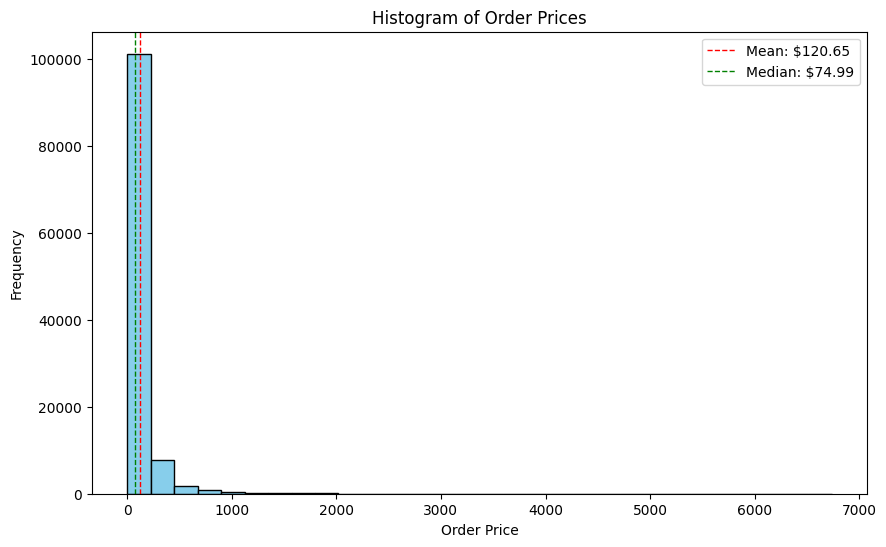

Mean order price: $120.65
Median order price: $74.99
Standard deviation of order prices: $183.63


In [10]:
# Step 1: Mean order price #
mean_order_price = order_items_df['price'].mean()

# Step 2: Median order price #
median_order_price = order_items_df['price'].median()

# Step 3: Standard deviation of order prices #
std_order_price = order_items_df['price'].std()

# Step 4: Histogram of order prices #
import matplotlib.pyplot as plt

# Set figure size #
plt.figure(figsize=(10, 6))

# Plot histogram #
plt.hist(order_items_df['price'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title #
plt.xlabel('Order Price')
plt.ylabel('Frequency')
plt.title('Histogram of Order Prices')

# Add mean and median lines #
plt.axvline(mean_order_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: ${mean_order_price:.2f}')
plt.axvline(median_order_price, color='green', linestyle='dashed', linewidth=1, label=f'Median: ${median_order_price:.2f}')

# Add legend #
plt.legend()

# Show plot #
plt.show()

# Step 5: Print the calculated statistics #
print(f"Mean order price: ${mean_order_price:.2f}")
print(f"Median order price: ${median_order_price:.2f}")
print(f"Standard deviation of order prices: ${std_order_price:.2f}")


SD wise, this means that, on average, individual order prices deviate from the mean order price by approximately $183.63. A higher standard deviation indicates greater variability in order prices, suggesting that the prices are spread out over a wider range.

Product Category Distribution:

    Bar chart: To show the number of orders placed in each product category. It helps identify which categories are most popular among customers.
    Payment Method Distribution:
    Pie chart: This illustrates the proportion of orders made using different payment methods, such as credit card, debit card, or boleto (Brazilian payment method).

Product dataset is missing values from product_category_name and from product_name_lenght           
product_description_lenght    
product_photos_qty
These are not as important for the current calcutaion as product_category_name. So we're replacing the missing values from this category with cat_names_not_listed

In [11]:
products_df['product_category_name'].fillna('cat_names_not_listed', inplace=True)


And then we create the Bar Chart showing Product Category Distribution. On the first bar chart I created the horizontal axis I created was very crowded. So I created a new one with different components to make it clearer, including rotating the labels and adjusting the layout to stop labels from overlapping.   

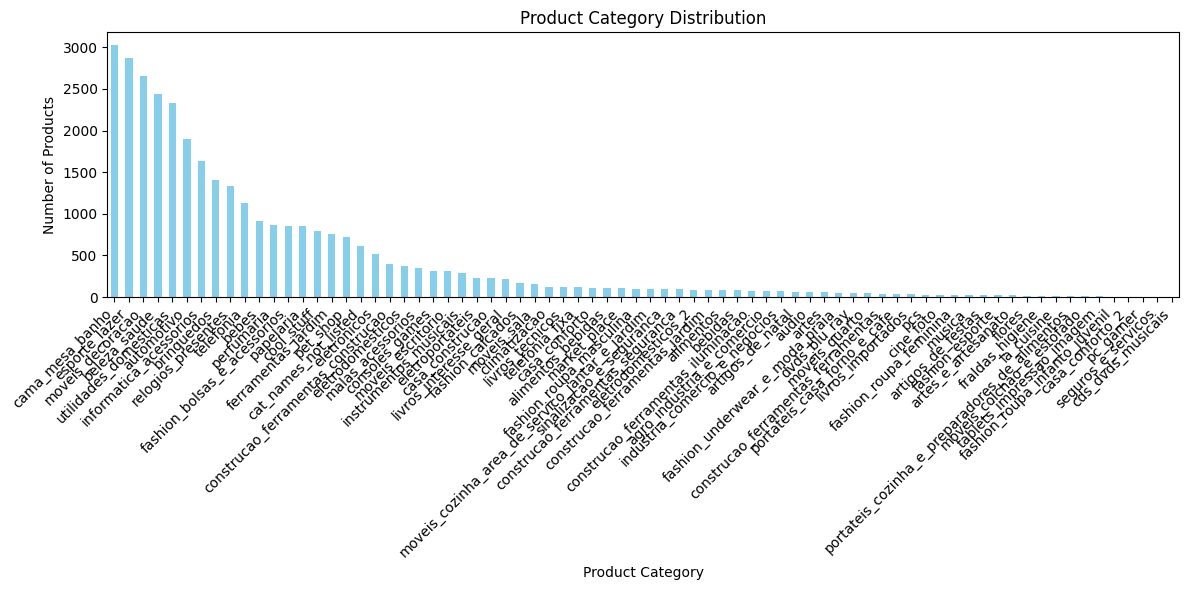

In [12]:
import matplotlib.pyplot as plt

# Count the number of products in each category #
category_counts = products_df['product_category_name'].value_counts()

# Plot the bar chart with rotated labels #
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate the rotated labels
category_counts.plot(kind='bar', color='skyblue')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  # Rotate the labels by 45 degrees and align them to the right to make visualisaton clearer #
plt.tight_layout()  # Adjust layout to prevent label overlap #
plt.show()


To create the pie chart Pie illustrating the proportion of orders made using different payment methods, such as credit card, debit card, or boleto (Brazilian payment method) we're using the Order Payments dataset:  order_payments_df which is not missing any data.

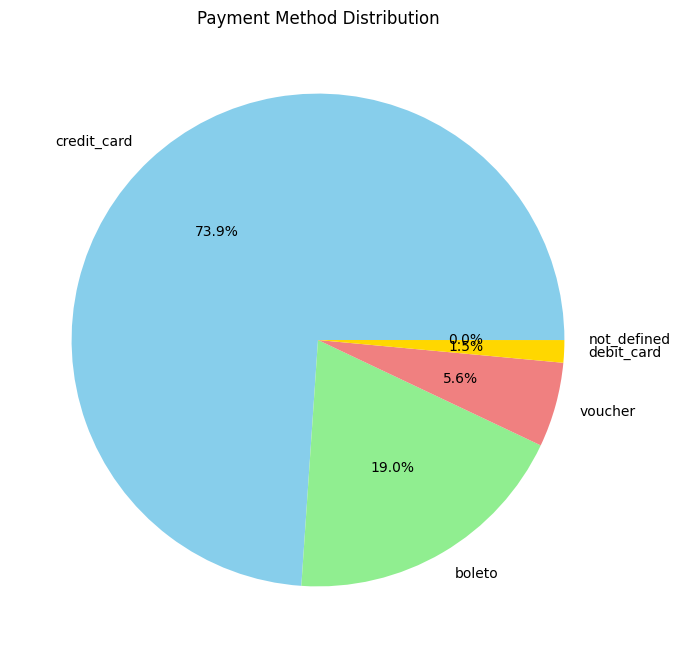

In [13]:
# Count the number of orders made using each payment method #
payment_method_counts = order_payments_df['payment_type'].value_counts()

# Plot the pie chart #
plt.figure(figsize=(8, 8))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()



This tells me that the significant majority of payments were made by credit card, with boleto being the second highest payment method.

For the next challenge areas I will need to utilise dates and so will now clean the date formarts to datetime.

In [14]:
# Convert date fields to datetime format for ORDERS #
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])


In [15]:
# Convert date field to datetime format for ORDER_ITEMS #
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])


In [16]:
# Convert date field to datetime format for ORDER_REVIEWS #
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])


ShipsShipping Time Statistics:

    Mean shipping time: This gives the average time taken for orders to be delivered to customers. D days
    Median shipping time: Similar to the median for order price and customer age, this represents the middle value of shipping times. E days
    Standard deviation of shipping times: This measures the variability in shipping times. F days
    Boxplot of shipping times: This visualizes the spread of shipping times, showing the minimum, maximum, median, and outliers.


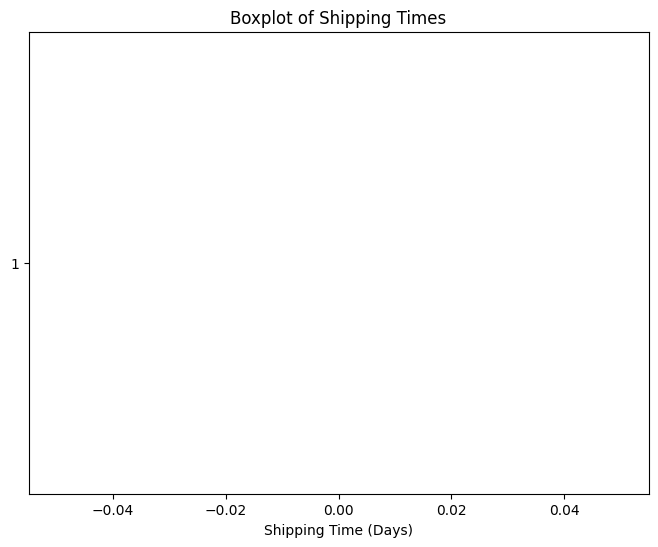

Mean shipping time: 12.09 days
Median shipping time: 10.00 days
Standard deviation of shipping times: 9.55 days


In [17]:
# Calculate shipping times in days #
orders_df['shipping_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Calculate Mean shipping time #
mean_shipping_time = orders_df['shipping_time'].mean()

# Calculate Median shipping time #
median_shipping_time = orders_df['shipping_time'].median()

# Calculate Standard deviation of shipping times #
std_shipping_time = orders_df['shipping_time'].std()

# Create a boxplot of shipping times #
plt.figure(figsize=(8, 6))
plt.boxplot(orders_df['shipping_time'], vert=False)
plt.title('Boxplot of Shipping Times')
plt.xlabel('Shipping Time (Days)')
plt.show()

print(f"Mean shipping time: {mean_shipping_time:.2f} days")
print(f"Median shipping time: {median_shipping_time:.2f} days")
print(f"Standard deviation of shipping times: {std_shipping_time:.2f} days")


Although the statistical calculation has been done this boxplot is visualising nothing. In order to resolve I've tried creating the boxplot in Seaborn, with more success as below.

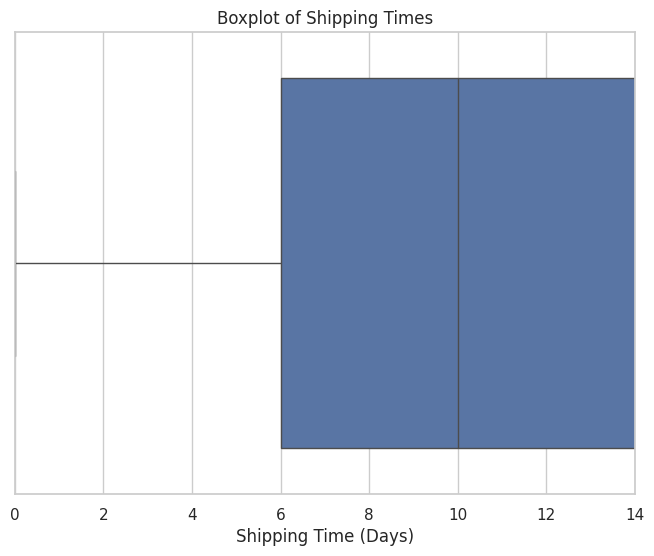

In [18]:
import seaborn as sns

# Set the style of the seaborn plot #
sns.set(style="whitegrid")

# Create the boxplot using seaborn #
plt.figure(figsize=(8, 6))
sns.boxplot(x=orders_df['shipping_time'], orient='h', showfliers=True, whis=1.5)
plt.title('Boxplot of Shipping Times')
plt.xlabel('Shipping Time (Days)')
plt.xlim(0, 14)
plt.show()



 I also reconfigured the range to better visualise the spread of the data.

Customer Satisfaction Ratings:

    Mean satisfaction rating: This gives the average satisfaction rating across all orders.
    Median satisfaction rating:Proportion of satisfied (rating >= 4) vs. dissatisfied customers (rating < 4).
    Proportion of satisfied vs. dissatisfied customers: This shows the percentage of customers who rated their satisfaction as high (4 or 5) versus low (1 to 3), providing insights into overall customer satisfaction levels.

Although there is some missing data in the relevant dataset: order_reviews_df there is no missing data in the category we'll be using which is reveiw_score

In [19]:
# Calculate mean satisfaction rating #
mean_satisfaction_rating = order_reviews_df['review_score'].mean()

# Calculate median satisfaction rating #
median_satisfaction_rating = order_reviews_df['review_score'].median()

# Calculate proportion of satisfied vs. dissatisfied customers #
satisfied_customers = (order_reviews_df['review_score'] >= 4).sum()
dissatisfied_customers = (order_reviews_df['review_score'] < 4).sum()
total_customers = len(order_reviews_df)
proportion_satisfied = satisfied_customers / total_customers
proportion_dissatisfied = dissatisfied_customers / total_customers

# Print the results #
print(f"Mean satisfaction rating: {mean_satisfaction_rating:.2f}")
print(f"Median satisfaction rating: {median_satisfaction_rating}")
print(f"Proportion of satisfied customers: {proportion_satisfied:.2%}")
print(f"Proportion of dissatisfied customers: {proportion_dissatisfied:.2%}")


Mean satisfaction rating: 4.09
Median satisfaction rating: 5.0
Proportion of satisfied customers: 77.07%
Proportion of dissatisfied customers: 22.93%


In order to display the data I've chosen a simple Pie Chart

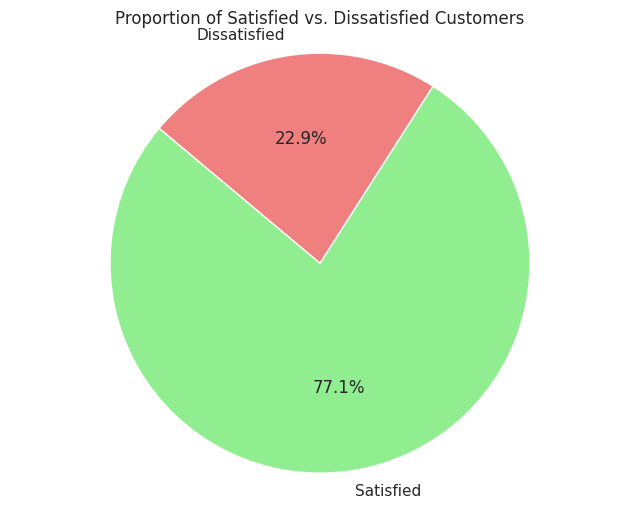

In [20]:
# Data #
labels = ['Satisfied', 'Dissatisfied']
sizes = [proportion_satisfied, proportion_dissatisfied]
colors = ['lightgreen', 'lightcoral']

# Plot #
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Satisfied vs. Dissatisfied Customers')
plt.axis('equal')
plt.show()


Exploring insights into the relationships between different variables in the dataset, which can inform business decisions and strategies for improving customer experience and satisfaction.

To do this we need to map the data more fully and understand where variables can be joined and the relationships between available datasets.

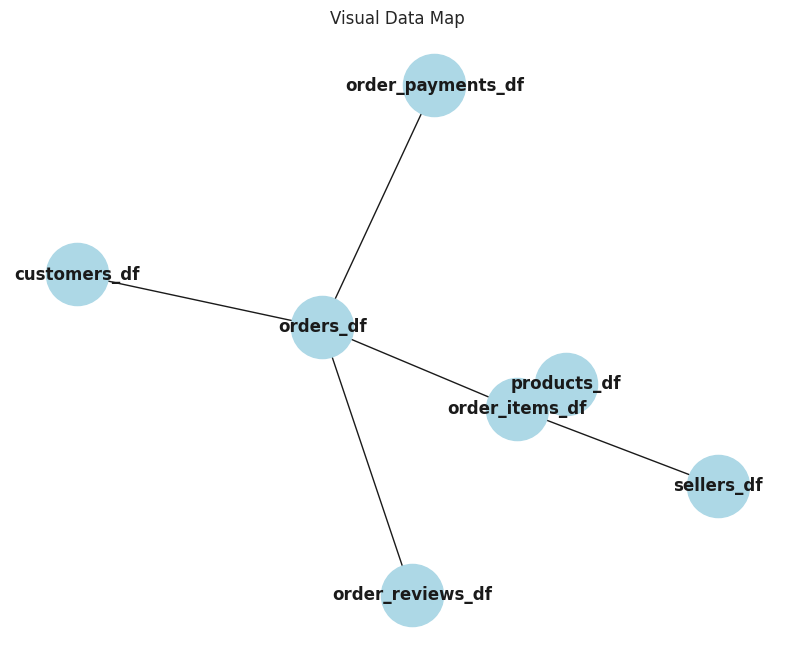

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph #
G = nx.DiGraph()

# Add nodes for each dataset #
datasets = ['products_df', 'order_items_df', 'orders_df', 'customers_df', 'sellers_df', 'order_payments_df', 'order_reviews_df']
G.add_nodes_from(datasets)

# Add edges to represent connections between datasets #
edges = [('products_df', 'order_items_df'),
         ('order_items_df', 'orders_df'),
         ('orders_df', 'customers_df'),
         ('order_items_df', 'sellers_df'),
         ('orders_df', 'order_payments_df'),
         ('orders_df', 'order_reviews_df')]
G.add_edges_from(edges)

# Plot the network graph #
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10)
plt.title('Visual Data Map')
plt.axis('off')
plt.show()


Order Price vs. Customer Satisfaction Rating: Is there a correlation between the amount spent on orders and the satisfaction rating given by customers?

We can join the order_items_df and order_reviews_df tables based on the common column order_id, as they contain the necessary information about order price and satisfaction rating. We're calling this table order_items_reviews.

In [22]:
import pandas as pd #

# Merge order_items_df and order_reviews_df based on order_id #
order_items_reviews = pd.merge(order_items_df, order_reviews_df, on='order_id', how='inner')

# Extract order price and satisfaction rating data from the merged DataFrame #
order_price = order_items_reviews['price']
satisfaction_rating = order_items_reviews['review_score']


Now I can complete the Order Price vs. Customer Satisfaction Rating calculation on the merged table.

Correlation coefficient between order price and satisfaction rating: -0.003940870070211974


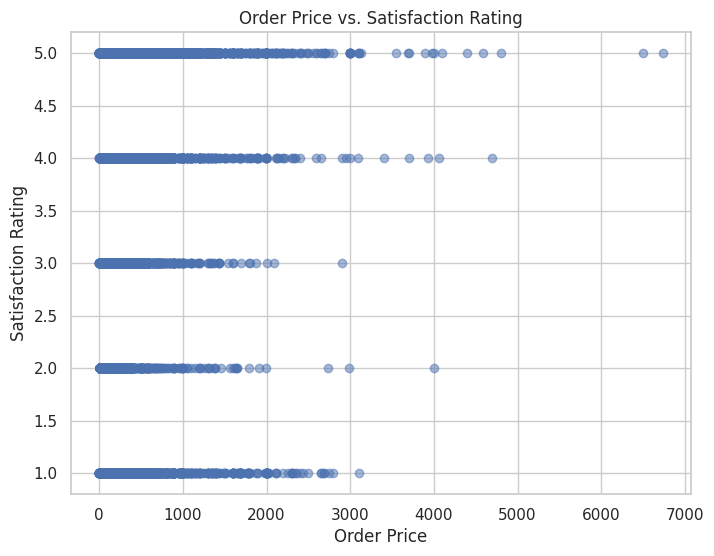

In [23]:
# Calculate the correlation coefficient #
correlation_coefficient = order_price.corr(satisfaction_rating)
print("Correlation coefficient between order price and satisfaction rating:", correlation_coefficient)

# Create a scatter plot #
plt.figure(figsize=(8, 6))
plt.scatter(order_price, satisfaction_rating, alpha=0.5)
plt.title('Order Price vs. Satisfaction Rating')
plt.xlabel('Order Price')
plt.ylabel('Satisfaction Rating')
plt.grid(True)
plt.show()


This coefficient of -0.0039 indicates a negligible, correlation between order price and satisfaction rating.

Payment Method vs. Customer Satisfaction Rating: Is there a correlation between the payment method used and the satisfaction rating given by customers?

This analysis could reveal whether customers who use certain payment methods are more satisfied with their purchases than other.

Firstly, I want to join the relevant datasets order_payments_df and order_reviews_df. These two  can be merged on order id and we call the merged dataset order_payments_reviews.




In [24]:
# Merge order_payments_df and order_reviews_df based on order_id #
order_payments_reviews = pd.merge(order_payments_df, order_reviews_df, on='order_id', how='inner')

# Extract payment method and satisfaction rating data from the merged DataFrame #
payment_method = order_payments_reviews['payment_type']
satisfaction_rating = order_payments_reviews['review_score']


And then we want to calculate the correlation.

Average Satisfaction Rating by Payment Method:
payment_type
boleto         4.086631
credit_card    4.087637
debit_card     4.168084
not_defined    1.666667
voucher        4.003804
Name: review_score, dtype: float64


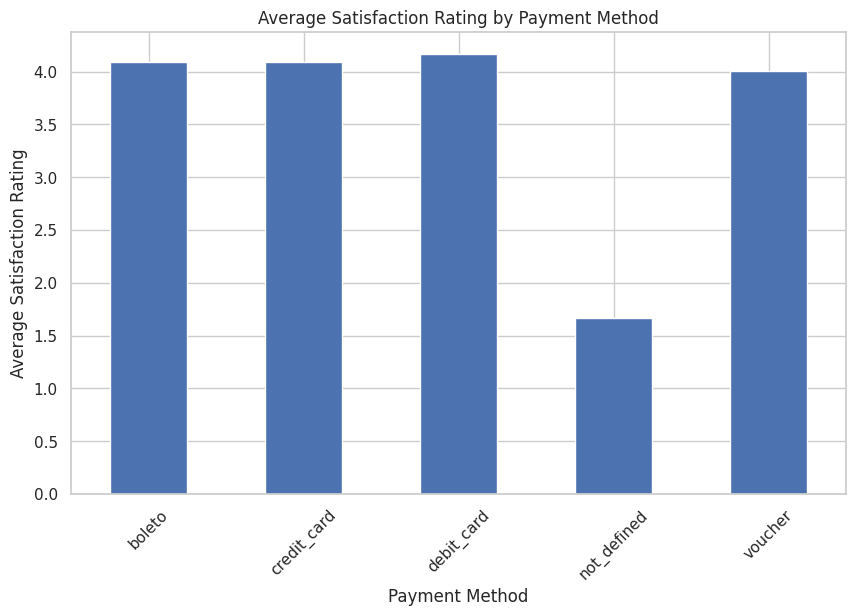

In [29]:
# Calculate the average satisfaction rating for each payment method #
average_rating_by_payment = order_payments_reviews.groupby('payment_type')['review_score'].mean()

# Print the average satisfaction ratings #
print("Average Satisfaction Rating by Payment Method:")
print(average_rating_by_payment)

# Create a bar plot to visualize the average satisfaction rating for each payment method #
average_rating_by_payment.plot(kind='bar', figsize=(10, 6))
plt.title('Average Satisfaction Rating by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=45)
plt.show()


    Boleto and Credit Card: Customers who used either Boleto or Credit Card as their payment method had similar average satisfaction ratings, both around 4.09, suggesting that customers who used these payment methods were generally satisfied with their purchases.

    Debit Card: Customers who used Debit Card had a slightly higher average satisfaction rating of 4.17 compared to Boleto and Credit Card users which indicates that customers who paid with Debit Card were slightly more satisfied, on average, than those who used other payment methods. This cohort has the highest average satisfaction rating among the specified payment methods.

    Not Defined: The "Not Defined" payment method has a significantly lower average satisfaction rating of 1.67, indicating that there might be issues or errors associated with orders where the payment method was not properly defined or recorded.

    Voucher: Customers who used Voucher as their payment method had an average satisfaction rating of 4.00, indicating that they were generally satisfied with their purchases, although slightly less so compared to Debit Card, Boleto and Credit Card users.

In [ ]:
Testing Shipping Time vs. Customer Satisfaction Rating: Is there a correlation between the time taken for shipping and the satisfaction rating given by customers?

Orders_df can be merged to order_reviews_df on order_id and we'll call this merged dataset order_review_ship.

In [30]:
# Merge orders_df and order_reviews_df based on order_id #
order_review_ship = pd.merge(orders_df, order_reviews_df, on='order_id', how='inner')

# Calculate shipping time in days #
order_review_ship['shipping_time'] = (order_review_ship['order_delivered_customer_date'] - order_review_ship['order_purchase_timestamp']).dt.days

# Extract satisfaction rating data from the merged DataFrame #
satisfaction_rating = order_review_ship['review_score']


And then explore the correlation:

In [31]:
# Calculate the correlation coefficient #
correlation_coefficient = order_review_ship['shipping_time'].corr(satisfaction_rating)
print("Correlation coefficient between shipping time and satisfaction rating:", correlation_coefficient)


Correlation coefficient between shipping time and satisfaction rating: -0.333660341104771


In this case, the correlation coefficient is moderately negative, indicating a moderate negative correlation between shipping time and satisfaction rating and a negative correlation suggests that longer shipping times are associated with lower satisfaction ratings, while shorter shipping times are associated with higher satisfaction ratings. Overall we could say that the analysis indicates that there is a moderate negative correlation between the time taken for shipping and the satisfaction rating given by customers. This suggests that customers tend to be less satisfied when shipping times are longer and more satisfied when shipping times are shorter.

Product Category vs. Customer Satisfaction Rating: Is there a correlation between the product category and the satisfaction rating given by customers?

This analysis could show whether customers have varying satisfaction levels depending on the type of product they purchase.

I've already replaced the missing values in category_name column with cat_names_not_listed.



For this calculation we need to merge products_df with order_reviews_df via order_items_df. We've called this new merged dataset product_satisfaction_items

In [33]:
# Merge products_df and order_items_df based on product_id #
merged_products_order_items = pd.merge(products_df, order_items_df, on='product_id', how='inner')

# Merge merged_products_order_items and order_reviews_df based on order_id #
product_satisfaction_items = pd.merge(merged_products_order_items, order_reviews_df, on='order_id', how='inner')

# Display the first few rows of the merged DataFrame
print(product_satisfaction_items.head())


                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0     

Now that we've merged these datasets, to run this calculation we need to consider that the product category is a categorical variable and the satisfaction rating is an ordinal variable, and so calculating the correlation coefficient may not be the most appropriate approach. We should maybe use an ANOVA instead.

In [34]:
import scipy.stats as stats

# Drop null values from product_satisfaction_items #
product_satisfaction_items.dropna(subset=['product_category_name'], inplace=True)

# Perform ANOVA test #
anova_result = stats.f_oneway(*[group['review_score'] for name, group in product_satisfaction_items.groupby('product_category_name')])
print("ANOVA p-value:", anova_result.pvalue)



ANOVA p-value: 5.625985338077974e-173


3. Hypothesis Testing (A/B Testing):

    Select a hypothesis to test (e.g., Does the shipping time affect customer satisfaction?).
    Define null and alternative hypotheses.
    Divide the dataset into control and treatment groups (e.g., orders with standard shipping vs. express shipping).
    Choose an appropriate statistical test (e.g., t-test, chi-square test) based on the data and hypothesis.
    Conduct the hypothesis test.
    Interpret the results and draw conclusions.
    
Some examples demonstrating how hypothesis testing (A/B testing) can be applied to analyze the impact of different factors on various aspects of e-commerce operations, such as customer satisfaction, order value, and completion rates.

So in the example above Hypothesis 1:

    Null Hypothesis (H0): There is no difference in customer satisfaction among different product categories.

    Alternative Hypothesis (H1): Different product categories have higher customer satisfaction compared to orders.

The p-value here is small (smaller than the significance level of 0.05), we can reject the null hypothesis and conclude that there are significant differences in satisfaction ratings among different product categories.

This suggests that the type of product purchased does have an impact on customer satisfaction levels.

We could, if we chose to then look at top scoring categories and lowest scoring categories in order to explore differences. But here we're just going to list the top and lowest scoring product categories as examples.

In [46]:
import pandas as pd

# Calculate average satisfaction rating for each product category #
avg_satisfaction_by_category = product_satisfaction_items.groupby('product_category_name')['review_score'].mean()

# Sort the DataFrame by average satisfaction rating #
avg_satisfaction_by_category_sorted = avg_satisfaction_by_category.sort_values(ascending=False)

# Get top 5 product categories with highest satisfaction ratings #
top_5_high_satisfaction = avg_satisfaction_by_category_sorted.head(5)

# Get top 5 product categories with lowest satisfaction ratings #
top_5_low_satisfaction = avg_satisfaction_by_category_sorted.tail(5)

# Print the tables #
print("Top 5 Product Categories with Highest Satisfaction Ratings:")
print(top_5_high_satisfaction)
print("\nTop 5 Product Categories with Lowest Satisfaction Ratings:")
print(top_5_low_satisfaction)



Top 5 Product Categories with Highest Satisfaction Ratings:
product_category_name
cds_dvds_musicais                     4.642857
fashion_roupa_infanto_juvenil         4.500000
livros_interesse_geral                4.446266
construcao_ferramentas_ferramentas    4.444444
flores                                4.419355
Name: review_score, dtype: float64

Top 5 Product Categories with Lowest Satisfaction Ratings:
product_category_name
moveis_escritorio                                3.493183
pc_gamer                                         3.333333
portateis_cozinha_e_preparadores_de_alimentos    3.266667
fraldas_higiene                                  3.256410
seguros_e_servicos                               2.500000
Name: review_score, dtype: float64


And to visualise:

<ipython-input-44-1a398b095362>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=product_satisfaction_items, x='review_score', y='product_category_name', order=avg_satisfaction_by_category.index, ci=None, palette='viridis')
<ipython-input-44-1a398b095362>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_satisfaction_items, x='review_score', y='product_category_name', order=avg_satisfaction_by_category.index, ci=None, palette='viridis')


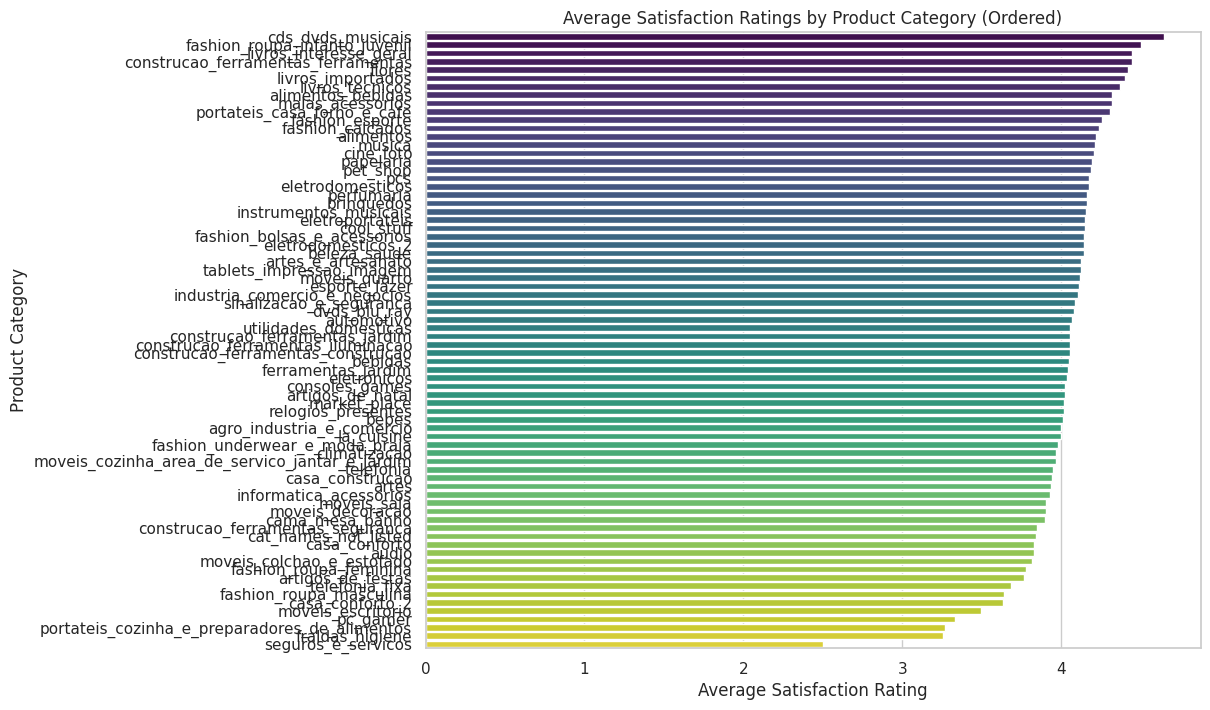

In [44]:
import seaborn as sns

# Calculate average satisfaction rating for each product category #
avg_satisfaction_by_category = product_satisfaction_items.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)

# Set up the figure and axes #
plt.figure(figsize=(10, 8))

# Plot the bar chart #
sns.barplot(data=product_satisfaction_items, x='review_score', y='product_category_name', order=avg_satisfaction_by_category.index, ci=None, palette='viridis')

# Add title and labels #
plt.title('Average Satisfaction Ratings by Product Category (Ordered)')
plt.xlabel('Average Satisfaction Rating')
plt.ylabel('Product Category')

# Show plot #
plt.show()





Testing the Impact of Payment Method on Order Completion Rate:

So Hypothesis 2 here is::
        Null Hypothesis (H0): There is no difference in the completion rate between orders paid via credit card and orders paid via boleto (Brazilian payment method).
        Alternative Hypothesis (H1): Orders paid via credit card have a higher completion rate compared to orders paid via boleto.

         Firstly I'm going to merge order_payments_df and orders_df based on order_id and call it payments_completion

In [48]:
# Merge order_payments_df and orders_df based on order_id #
payments_completion = pd.merge(order_payments_df, orders_df[['order_id', 'order_status']], on='order_id', how='inner')

# Display the first few rows of the merged DataFrame #
print(payments_completion.head())


                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value order_status  
0                     8          99.33    delivered  
1                     1          24.39    delivered  
2                     1          65.71    delivered  
3                     8         107.78    delivered  
4                     2         128.45    delivered  


Now I'm going to conduct  the  A/B Testing Process:
        Divide the dataset into two groups based on payment methods: credit card and boleto.
        Calculate the completion rate (percentage of orders successfully completed) for each group.
        

In [49]:
# Group the data by payment method and calculate completion rate #
completion_rate = payments_completion.groupby('payment_type')['order_status'].apply(lambda x: (x == 'delivered').mean() * 100)

# Print the completion rates for each payment method #
print("Completion Rate by Payment Method:")
print(completion_rate)


Completion Rate by Payment Method:
payment_type
boleto         97.002628
credit_card    97.123511
debit_card     97.187704
not_defined     0.000000
voucher        95.116883
Name: order_status, dtype: float64


Conduct a hypothesis test (e.g., chi-square test) to determine if there is a statistically significant difference in completion rates between the two payment methods. In defining completion for now we should be counting anything that is not canceled as completed.

In [59]:
# Filter payments_completion DataFrame for credit card and boleto payment methods #
credit_card_orders = payments_completion[(payments_completion['payment_type'] == 'credit_card') & (payments_completion['order_status'] != 'canceled')]
boleto_orders = payments_completion[(payments_completion['payment_type'] == 'boleto') & (payments_completion['order_status'] != 'canceled')]

# Calculate completion rate for credit card and boleto payment methods #
credit_card_completion_rate = len(credit_card_orders) / len(payments_completion[payments_completion['payment_type'] == 'credit_card']) * 100
boleto_completion_rate = len(boleto_orders) / len(payments_completion[payments_completion['payment_type'] == 'boleto']) * 100

# Print completion rates #
print("Completion Rate for Credit Card Orders:", credit_card_completion_rate, "%")
print("Completion Rate for Boleto Orders:", boleto_completion_rate, "%")




Completion Rate for Credit Card Orders: 99.42183735920307 %
Completion Rate for Boleto Orders: 99.51981399110392 %


To understand the statistical significance we can perform a chi-square test. But since the completion rates for both payment methods are very high (around 99%), the chi-square test might not be the most appropriate choice due to potential limitations with such high success rates.

In [60]:
import scipy.stats as stats

# Define the observed frequencies for completion status of credit card and boleto orders #
credit_card_completion = payments_completion[payments_completion['payment_type'] == 'credit_card']['order_status']
boleto_completion = payments_completion[payments_completion['payment_type'] == 'boleto']['order_status']

credit_card_completion_rate = credit_card_completion.value_counts(normalize=True).get('delivered', 0)
boleto_completion_rate = boleto_completion.value_counts(normalize=True).get('delivered', 0)

# Perform chi-square test #
chi2, p = stats.chisquare([credit_card_completion_rate, boleto_completion_rate])

# Print the chi-square statistic and p-value #
print("Chi-square Statistic:", chi2)
print("P-value:", p)

# Determine if the result is statistically significant #
alpha = 0.05
if p < alpha:
    print("There is a statistically significant difference in completion rates between credit card and boleto payments.")
else:
    print("There is no statistically significant difference in completion rates between credit card and boleto payments.")


Chi-square Statistic: 7.527332758501112e-07
P-value: 0.9993077538252273
There is no statistically significant difference in completion rates between credit card and boleto payments.


Its suggested that we run a confidence interval test instead

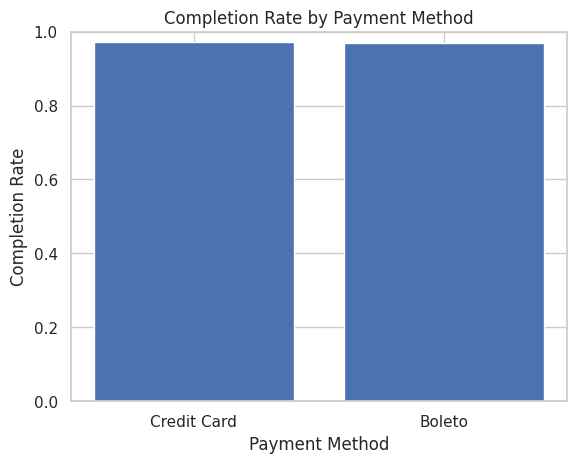

In [62]:
import matplotlib.pyplot as plt

# Plot the completion rates for credit card and boleto orders #
plt.bar(['Credit Card', 'Boleto'], [credit_card_completion_rate, boleto_completion_rate])
plt.xlabel('Payment Method')
plt.ylabel('Completion Rate')
plt.title('Completion Rate by Payment Method')
plt.ylim(0, 1)
plt.show()

So here the null hypothesis is true there is no significant difference in the completion rate between orders paid via credit card and orders paid via boleto.

Hypothesis 3: Customer Satisfaction by Seller Hypothesis:

    Null Hypothesis: There is no significant difference in the average satisfaction rating among different sellers.
    Alternative Hypothesis: There is a significant difference in the average satisfaction rating among different sellers.

  First we'll merge the order_items_df with the order_reviews_df on the order_id, and then merge the result with the sellers_df on the seller_id. This will give us the necessary data to analyze the average satisfaction rating among different sellers. I've called it seller_reviews.

In [63]:
# Merge order_items_df with order_reviews_df on order_id #
order_items_reviews = pd.merge(order_items_df, order_reviews_df, on='order_id', how='inner')

# Merge the result with sellers_df on seller_id #
seller_reviews = pd.merge(order_items_reviews, sellers_df, on='seller_id', how='inner')

# Display the first few rows of the merged DataFrame #
print(seller_reviews.head())


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  0188777fe321843a18be24a6e9aa1e53              1   
2  0191bbb5166d4b9a68df11797d5acfa9              1   
3  03054d8a8eefc2981cfad06f58e27979              1   
4  0c325ea6925de749e1420be0cf43587c              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  436c8d57ff8d4aa254318e9bd9b48c83  48436dade18ac8b2bce089ec2a041202   
2  ec02a5d380128f7a188e9ce8f3ddd832  48436dade18ac8b2bce089ec2a041202   
3  3e31fd1419cc4cd6adad1925e72e3a03  48436dade18ac8b2bce089ec2a041202   
4  3a135477bf41350a0b1d8afdf616d446  48436dade18ac8b2bce089ec2a041202   

  shipping_limit_date  price  freight_value                         review_id  \
0 2017-09-19 09:45:35   58.9          13.29  97ca439bc427b48bc1cd7177abe71365   
1 2017-07-31 14:35:11   55.9           9.94  1fac9acb29e014e3b9b393d5c8505

Now we test for differences in the average ratings...

In [64]:
import scipy.stats as stats

# Perform ANOVA test #
anova_result = stats.f_oneway(*[group['review_score'] for name, group in seller_reviews.groupby('seller_id')])

# Print the ANOVA result #
print("ANOVA p-value:", anova_result.pvalue)


ANOVA p-value: 0.0


With an ANOVA p-value of 0.0, we can conclude that there are statistically significant differences in the average satisfaction ratings among different sellers. This suggests that the seller from which a customer makes a purchase may have a significant impact on their satisfaction level. Therefore, here the alternative hypothesis is true.

I've created a non-exhaustive list to view top and bottom 10 sellers according to their ratings.

In [66]:
# Sort the seller_reviews DataFrame by average review score #
seller_reviews_sorted = seller_reviews.groupby('seller_id')['review_score'].mean().reset_index()
seller_reviews_sorted = seller_reviews_sorted.sort_values(by='review_score', ascending=False)

# Get the top 10 and bottom 10 reviewed sellers #
top_10_sellers = seller_reviews_sorted.head(10)
bottom_10_sellers = seller_reviews_sorted.tail(10)

# Display the tables #
print("Top 10 Reviewed Sellers:")
print(top_10_sellers)
print("\nBottom 10 Reviewed Sellers:")
print(bottom_10_sellers)


Top 10 Reviewed Sellers:
                             seller_id  review_score
339   1cd9e0cc1839d55516843def5600816d           5.0
1936  9fbd5666d8618fa571c4230fafa09bd6           5.0
2558  d3891911c2feae53c52fea2bd14054e5           5.0
1367  702835e4b785b67a084280efca355756           5.0
1962  a20d8058c866dbaeca014d2cd20ac62e           5.0
1963  a213f1bd6458f4a158f3746cb2514559           5.0
350   1d953075c2f0dd990bacf27b83b330f1           5.0
765   404e1ba01358af4cd63f679b2c4d1fa1           5.0
1971  a2b911e9ad40dc7d61c142a4683e2d85           5.0
1365  70126eecc6aa1274392a1743866e9678           5.0

Bottom 10 Reviewed Sellers:
                             seller_id  review_score
2539  d1e2fe627180431ffda076abb303c56f           1.0
359   1e47d8b6546eb3a77b1acddcc9406242           1.0
1204  62d977e2b2aee830de3e039a28490d12           1.0
376   1fddcb7b326905d3ad5efe82187db347           1.0
1773  90d4125885ab6c86e8820a722be71974           1.0
1775  913fd0ebba70bb919f7254a02239173c       

I've produced table showing the locations of the top rated sellers. I've limited this to 10.  

In [71]:
# Filter the seller data for those with a rating of 5
top_sellers = seller_reviews[seller_reviews['review_score'] == 5]

# Get the top 10 most common cities of top-rated sellers
top_cities = top_sellers['seller_city'].value_counts().head(10)

# Display the top 10 most common cities
print("Top 10 Most Common Cities of Top-rated Sellers:")
print(top_cities)





Top 10 Most Common Cities of Top-rated Sellers:
seller_city
sao paulo                15625
ibitinga                  3797
curitiba                  1939
santo andre               1788
belo horizonte            1531
sao jose do rio preto     1456
rio de janeiro            1418
guarulhos                 1385
maringa                   1189
ribeirao preto            1177
Name: count, dtype: int64


The top location for top rated sellers is sao paulo. This is likely as this is where the most dense population of sellers is located and it may also be the top location of lowest rated sellers.